/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Number of failed images: 10


epoch,train_loss,valid_loss,accuracy,time
0,1.213009,0.480849,0.830769,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.479642,0.267823,0.876923,00:13
1,0.357734,0.157759,0.938462,00:14
2,0.293992,0.144314,0.969231,00:13
3,0.254018,0.149499,0.969231,00:13
4,0.230502,0.143172,0.953846,00:14


TypeError: unsupported format string passed to AvgMetric.__format__

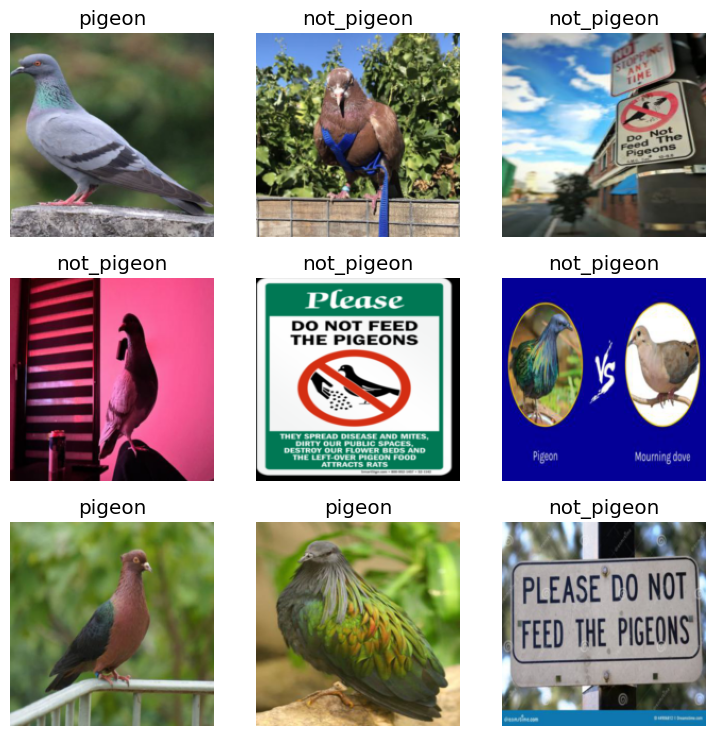

In [6]:


# Import necessary modules
from fastbook import *
from fastai.vision.all import *
from fastdownload import download_url
from pathlib import Path

# Set up the search terms and paths
search_terms = ['pigeon', 'not_pigeon']
path = Path('pigeon_data')

# Download and prepare the dataset
for term in search_terms:
    dest = (path/term)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images_ddg(f'{term} photo', max_images=50)
    download_images(dest, urls=urls)
    resize_images(path/term, max_size=400, dest=path/term)

# Verify images and remove any that failed to download
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Number of failed images: {len(failed)}")

# Set up the DataBlock for the model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

# Show a batch of images (optional)
dls.show_batch(max_n=9)

# Create and train the model
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

# Print the final accuracy
print(f"Final accuracy: {learn.recorder.metrics[-1]:.4f}")

# Interpret the results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.show()

# Save the model
learn.export('pigeon_model.pkl')

# Function to predict if an image is a pigeon
def predict_pigeon(img_path):
    # Load the saved model
    learn = load_learner('pigeon_model.pkl')
    
    # Load and process the image
    img = PILImage.create(img_path)
    
    # Get the prediction
    pred, pred_idx, probs = learn.predict(img)
    
    # Get the probability of being a pigeon (assuming 'pigeon' is the first class)
    pigeon_prob = probs[pred_idx].item()
    
    # Determine if it's a pigeon
    is_pigeon = "Yes" if pred == 'pigeon' else "No"
    
    return f"Prediction: {pred}\nProbability: {pigeon_prob:.2%}\nIs it a pigeon? {is_pigeon}"

# Example usage
image_path = "path/to/your/image.jpg"  # Replace with the path to your image
result = predict_pigeon(image_path)
print(result)

INFO:__main__:Number of failed images: 8


epoch,train_loss,valid_loss,accuracy,time
0,0.780838,0.502900,0.768293,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.289446,0.266762,0.865854,00:16
1,0.230317,0.256910,0.926829,00:16
2,0.208061,0.225317,0.939024,00:17
3,0.180514,0.230262,0.939024,00:16
4,0.167217,0.215236,0.939024,00:16


ERROR:__main__:Error getting final accuracy: unsupported format string passed to AvgMetric.__format__
INFO:__main__:Training metrics:
INFO:__main__:[<fastai.learner.AvgMetric object at 0x7f25033ea050>]


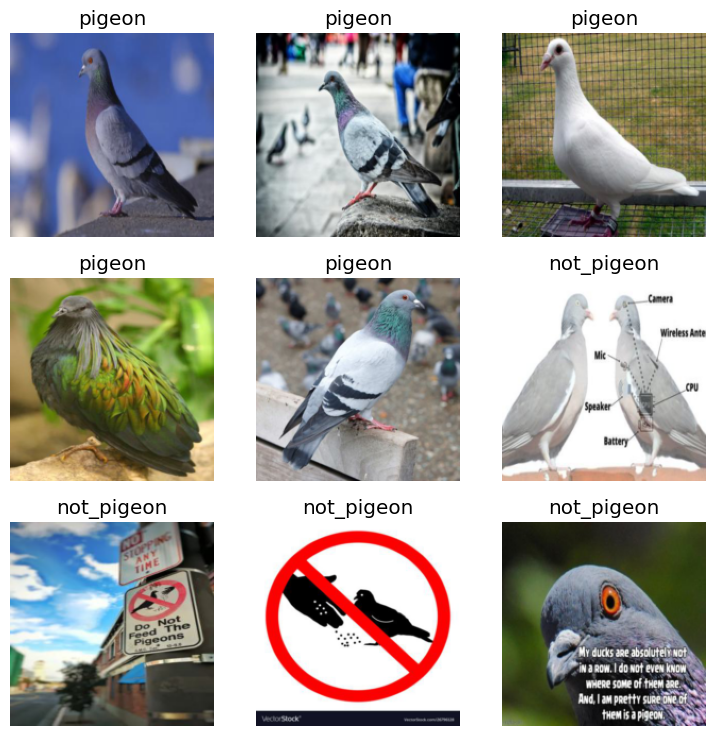

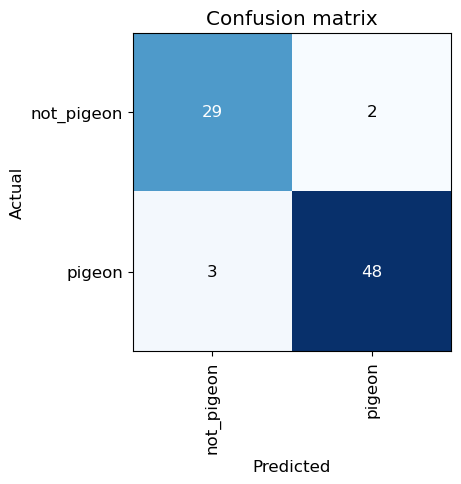

INFO:__main__:Model saved successfully as 'pigeon_model.pkl'


Error making prediction: [Errno 2] No such file or directory: 'path/to/your/image.jpg'


In [7]:
# Install required libraries
!pip install -Uqq fastbook fastai fastdownload

# Import necessary modules
from fastbook import *
from fastai.vision.all import *
from fastdownload import download_url
from pathlib import Path
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Set up the search terms and paths
search_terms = ['pigeon', 'not_pigeon']
path = Path('pigeon_data')

# Download and prepare the dataset
for term in search_terms:
    dest = (path/term)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images_ddg(f'{term} photo', max_images=50)
    download_images(dest, urls=urls)
    resize_images(path/term, max_size=400, dest=path/term)

# Verify images and remove any that failed to download
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
logger.info(f"Number of failed images: {len(failed)}")

# Set up the DataBlock for the model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

# Show a batch of images (optional)
dls.show_batch(max_n=9)

# Create and train the model
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

# Print the final accuracy
try:
    final_accuracy = learn.recorder.metrics[-1]
    if isinstance(final_accuracy, torch.Tensor):
        final_accuracy = final_accuracy.item()
    logger.info(f"Final accuracy: {final_accuracy:.4f}")
except Exception as e:
    logger.error(f"Error getting final accuracy: {str(e)}")
    logger.info("Training metrics:")
    logger.info(learn.recorder.metrics)

# Interpret the results
try:
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    plt.show()
except Exception as e:
    logger.error(f"Error plotting confusion matrix: {str(e)}")

# Save the model
try:
    learn.export('pigeon_model.pkl')
    logger.info("Model saved successfully as 'pigeon_model.pkl'")
except Exception as e:
    logger.error(f"Error saving model: {str(e)}")

# Function to predict if an image is a pigeon
def predict_pigeon(img_path):
    try:
        # Load the saved model
        learn = load_learner('pigeon_model.pkl')
        
        # Load and process the image
        img = PILImage.create(img_path)
        
        # Get the prediction
        pred, pred_idx, probs = learn.predict(img)
        
        # Get the probability of the predicted class
        prob = probs[pred_idx].item()
        
        # Determine if it's a pigeon
        is_pigeon = "Yes" if pred == 'pigeon' else "No"
        
        return f"Prediction: {pred}\nProbability: {prob:.2%}\nIs it a pigeon? {is_pigeon}"
    except Exception as e:
        return f"Error making prediction: {str(e)}"

# Example usage


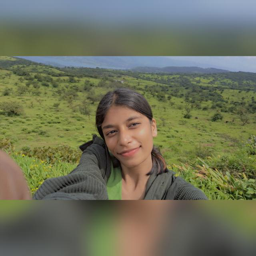

In [27]:
from fastbook import *
im =Image.open("pigeon2.jpg")
im.to_thumb(256,256)

In [24]:
image_path = "pigeon2.jpg"  # Replace with the path to your image
result = predict_pigeon(image_path)
print(result)

Prediction: not_pigeon
Probability: 100.00%
Is it a pigeon? No
